# Localización de los tweets

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
#df.columns.tolist()

Después de leer los datos, nos quedamos sólo con la serie de la zona horaria (time_zone) y hacemos un one-hot-encoding para ver de dónde proceden la mayoría de los tweets de la muestra.

In [7]:
# Select 'user_timezone'
df_timezones = df[['user_timezone']]
# Create a one-hot encoding.
sent_timezones = pd.get_dummies(df_timezones['user_timezone'])
#sent_timezones.head()

timezone_histogram = sent_timezones.sum()
percentage = timezone_histogram/timezone_histogram.sum()*100
percentage = percentage.sort_values(ascending=False)

print(percentage)

Madrid                         36.159406
Pacific Time (US & Canada)      8.868920
Buenos Aires                    6.387966
Greenland                       4.786091
Athens                          4.747021
Amsterdam                       4.688416
Bogota                          4.121899
Santiago                        3.672592
Central Time (US & Canada)      3.125610
London                          2.949795
Caracas                         2.617699
Eastern Time (US & Canada)      2.148857
Mexico City                     1.719086
Hawaii                          1.621410
Brasilia                        1.133034
Quito                           0.898613
Mountain Time (US & Canada)     0.840008
Paris                           0.742332
Ljubljana                       0.722797
Atlantic Time (Canada)          0.586052
Europe/Madrid                   0.527447
Dublin                          0.527447
Central America                 0.507912
Casablanca                      0.488377
Belgrade        

La mayoría (36%) de tweets proceden de España (Madrid). Hay zonas que se podrían agrupar por continentes:
- Madrid
- Resto de Europa
- US & Canada (Pacific Time+Central Time+Atlantic Time+etc)
- Buenos Aire+Santiago
- Africa
- Asia

Dibujamos las zonas más comunes (percentage > 1%).

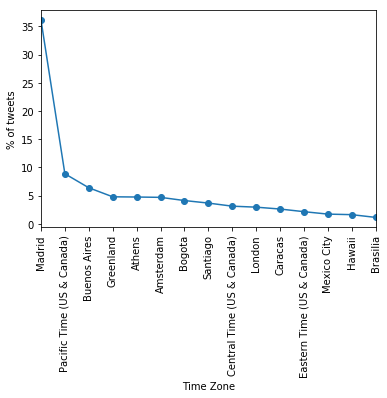

In [4]:
largest = percentage[percentage > 1]

# Lines plot
ax = largest.plot(marker='o')
ax.set_ylabel('% of tweets')
ax.set_xlabel('Time Zone')
ax.set_xticks(np.arange(len(largest)))
ax.set_xticklabels(largest.index.values, rotation=90)
plt.savefig("Location.jpg", bbox_inches='tight',dpi=400)
plt.show()